In [2]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


# Original Image

/Users/destiny/Downloads/算分/Python-Seam-Carving/notebooks/sc2/warnings.py:13: SeamCarvingWarning: Searching for image in images folder
  warnings.warn(*args, **kwargs, category=SeamCarvingWarning)


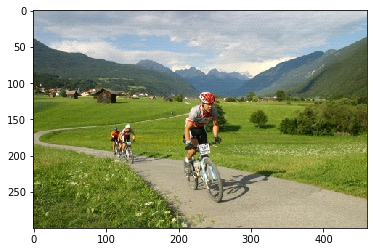

In [3]:
# let start from an image named "bicycle"
image = sc2.utils.image_load("bicycle")
# have a look at the original image
sc2.utils.image_show(image)

In [4]:
backup = np.copy(image)

In [5]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.3)

# Backward Energy（Conservative Method）

100%|██████████| 137/137 [00:06<00:00, 21.47it/s]


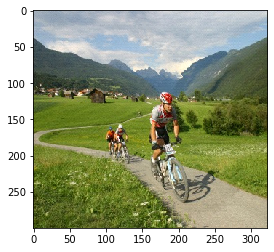

In [9]:
image = np.copy(backup)
# using backward energy
for i in tqdm.tqdm(range(steps - 1)):
    seam = sc2.advanced.seam_by_backward_energy(image)
    image = sc2.seamops.remove_seam(image, seam)

sc2.utils.image_show(image)

# Forward Energy
- **seam carving可能造成图片不自然的原因是移除一条seam的过程中引入了新的边缘**
- **希望引入新的边缘的能量尽可能小，即最小化$\Delta E_{t=i+1} = E ( I_{t=i+1} ) − [E ( I_{t=i} ) − E (C_i)]$**

## 可以通过DP计算forward energy
- $M(x, y)=P(x, y)+\min \left\{\begin{array}{l}C_{L}(x, y)+M(x-1, y-1) \\ C_{U}(x, y)+M(x, y-1) \\ C_{R}(x, y)+M(x+1, y-1)\end{array}\right.$
- $C_{U}(i, j)=|I(i, j+1)-I(i, j-1)|$
- $C_{L}(i, j)=|I(i, j+1)-I(i, j-1)|+|I(i-1, j)-I(i, j-1)|$
- $C_{R}(i, j)=|I(i, j+1)-I(i, j-1)|+|I(i-1, j)-I(i, j+1)|$

![forward energy](./src/forward.png)

100%|██████████| 137/137 [00:10<00:00, 13.11it/s]


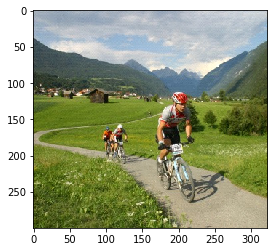

In [10]:
image = np.copy(backup)

# using forward energy
for i in tqdm.tqdm(range(steps - 1)):
    seam = sc2.advanced.seam_by_forward_energy(image)
    image = sc2.seamops.remove_seam(image, seam)

sc2.utils.image_show(image)

### Comparation: notice that the edges of the mountains are smoother and the player looks better